In [1]:
import json
import matplotlib.pyplot as plt
# Tusimple Dataset Management Tool
class Tusimple_Manager(object):
    # initialize
    def __init__(self, root_dir = '/home/sun/tusimple'):
        # train data root path
        self.train_path = root_dir + '/train_set/'
        # test data root path
        self.test_path = root_dir + '/test_set/'
        # train data annotation files
        self.train_label_files = ['label_data_0313.json' , 'label_data_0531.json' , 'label_data_0601.json']
        # test data annotation files
        self.test_label_files = ['test_label.json']

        # train annotation data
        self.train_data = []
        # train data size
        self.train_size = 0
        # test annotation data
        self.test_data = []
        # test data size
        self.test_size = 0

        # number of train_instance 1
        self.train_instance_1 = []
        # number of train_instance 2
        self.train_instance_2 = []
        # number of train_instance 3
        self.train_instance_3 = []
        # number of train_instance 4
        self.train_instance_4 = []
        # number of train_instance 5
        self.train_instance_5 = []
        # number of train_instance 6
        self.train_instance_6 = []


        # number of test_instance 1
        self.test_instance_1 = []
        # number of test_instance 2
        self.test_instance_2 = []
        # number of test_instance 3
        self.test_instance_3 = []
        # number of test_instance 4
        self.test_instance_4 = []
        # number of test_instance 5
        self.test_instance_5 = []
        # number of test_instance 6
        self.test_instance_6 = []

    # load the data
    def tusimple_load_from_json(self):
        # train data load
        print("* Train Data Load Start")
        for idx, label_file in enumerate(self.train_label_files):
            # print("* {} : {} Load Start".format(idx, label_file))

            with open(self.train_path + label_file) as f:
                for line in f.readlines():
                    json_line = json.loads(line)
                    self.train_data.append(json_line)

            # print("* {} : {} Load Finish".format(idx, label_file))
        self.train_size = len(self.train_data)

        print("* Train Data Load Finish")

        # test data load
        print("* Test Data Load Start")

        for idx, label_file in enumerate(self.test_label_files):
            # print("* {} : {} Load Start".format(idx, label_file))

            with open(self.test_path + label_file) as f:
                for line in f.readlines():
                    json_line = json.loads(line)
                    self.test_data.append(json_line)

        self.test_size = len(self.test_data)

        print("* Test Data Load Finish")

    # split according to the number of instances
    def tusimple_split_instance(self):
        print("**-----------------------------------------------**")
        print("* Train Data Split Start")
        # train data split
        for idx,instance in enumerate(self.train_data):
            if len(instance['lanes']) == 1:
                self.train_instance_1.append(instance)
            elif len(instance['lanes']) == 2:
                self.train_instance_2.append(instance)
            elif len(instance['lanes']) == 3:
                self.train_instance_3.append(instance)
            elif len(instance['lanes']) == 4:
                self.train_instance_4.append(instance)
            elif len(instance['lanes']) == 5:
                self.train_instance_5.append(instance)
            elif len(instance['lanes']) == 6:
                self.train_instance_6.append(instance)


        print("num_train_instance_1 : {}".format(len(self.train_instance_1)))
        print("num_train_instance_2 : {}".format(len(self.train_instance_2)))
        print("num_train_instance_3 : {}".format(len(self.train_instance_3)))
        print("num_train_instance_4 : {}".format(len(self.train_instance_4)))
        print("num_train_instance_5 : {}".format(len(self.train_instance_5)))
        print("num_train_instance_6 : {}".format(len(self.train_instance_6)))


        print("* Train Data Split Finish")
        print("**-----------------------------------------------**")

        print("* Test Data Split Start")

        # test data split
        for idx,instance in enumerate(self.test_data):
            if len(instance['lanes']) == 1:
                self.test_instance_1.append(instance)
            elif len(instance['lanes']) == 2:
                self.test_instance_2.append(instance)
            elif len(instance['lanes']) == 3:
                self.test_instance_3.append(instance)
            elif len(instance['lanes']) == 4:
                self.test_instance_4.append(instance)
            elif len(instance['lanes']) == 5:
                self.test_instance_5.append(instance)
            elif len(instance['lanes']) == 6:
                self.test_instance_6.append(instance)

        print("num_test_instance_1 : {}".format(len(self.test_instance_1)))
        print("num_test_instance_2 : {}".format(len(self.test_instance_2)))
        print("num_test_instance_3 : {}".format(len(self.test_instance_3)))
        print("num_test_instance_4 : {}".format(len(self.test_instance_4)))
        print("num_test_instance_5 : {}".format(len(self.test_instance_5)))
        print("num_test_instance_6 : {}".format(len(self.test_instance_6)))

        print("* Test Data Split Finish")

        print("**-----------------------------------------------**")



In [2]:
tusimple_manager = Tusimple_Manager()

In [3]:
tusimple_manager.tusimple_load_from_json()

* Train Data Load Start
* Train Data Load Finish
* Test Data Load Start
* Test Data Load Finish


In [4]:
tusimple_manager.tusimple_split_instance()

**-----------------------------------------------**
* Train Data Split Start
num_train_instance_1 : 0
num_train_instance_2 : 1
num_train_instance_3 : 404
num_train_instance_4 : 2982
num_train_instance_5 : 239
num_train_instance_6 : 0
* Train Data Split Finish
**-----------------------------------------------**
* Test Data Split Start
num_test_instance_1 : 0
num_test_instance_2 : 5
num_test_instance_3 : 1740
num_test_instance_4 : 468
num_test_instance_5 : 569
num_test_instance_6 : 0
* Test Data Split Finish
**-----------------------------------------------**


In [5]:
data = tusimple_manager.train_instance_5[0]

In [6]:
import numpy as np

datas = []

for lane_idx, lane_x_points in enumerate(data['lanes'],0):
    curve_vertices = list(filter(lambda xy_pair : xy_pair[0] > 0, zip(lane_x_points, data['h_samples'])))
    curve_vertices = np.array(curve_vertices, dtype=np.float)
    datas.append(np.flip(curve_vertices, axis=0))

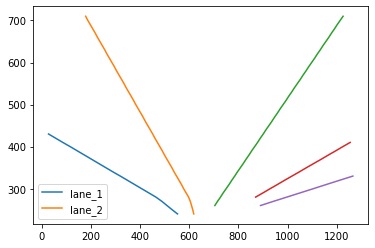

In [7]:
for data in datas:
    plt.plot(data[:, 0], data[:, 1])

plt.legend(["lane_1", "lane_2"])

In [8]:
print(datas)

[array([[ 27., 430.],
       [ 56., 420.],
       [ 85., 410.],
       [115., 400.],
       [144., 390.],
       [173., 380.],
       [202., 370.],
       [231., 360.],
       [260., 350.],
       [289., 340.],
       [319., 330.],
       [348., 320.],
       [377., 310.],
       [406., 300.],
       [435., 290.],
       [464., 280.],
       [488., 270.],
       [509., 260.],
       [530., 250.],
       [552., 240.]]), array([[178., 710.],
       [187., 700.],
       [197., 690.],
       [207., 680.],
       [217., 670.],
       [226., 660.],
       [236., 650.],
       [246., 640.],
       [256., 630.],
       [265., 620.],
       [275., 610.],
       [285., 600.],
       [295., 590.],
       [304., 580.],
       [314., 570.],
       [324., 560.],
       [334., 550.],
       [343., 540.],
       [353., 530.],
       [363., 520.],
       [373., 510.],
       [382., 500.],
       [392., 490.],
       [402., 480.],
       [412., 470.],
       [421., 460.],
       [431., 450.],
       [44

[[0.02109375 0.59722222]
 [0.04375    0.58333333]
 [0.06640625 0.56944444]
 [0.08984375 0.55555556]
 [0.1125     0.54166667]
 [0.13515625 0.52777778]
 [0.1578125  0.51388889]
 [0.18046875 0.5       ]
 [0.203125   0.48611111]
 [0.22578125 0.47222222]
 [0.24921875 0.45833333]
 [0.271875   0.44444444]
 [0.29453125 0.43055556]
 [0.3171875  0.41666667]
 [0.33984375 0.40277778]
 [0.3625     0.38888889]
 [0.38125    0.375     ]
 [0.39765625 0.36111111]
 [0.4140625  0.34722222]
 [0.43125    0.33333333]]
[[0.1390625  0.98611111]
 [0.14609375 0.97222222]
 [0.15390625 0.95833333]
 [0.16171875 0.94444444]
 [0.16953125 0.93055556]
 [0.1765625  0.91666667]
 [0.184375   0.90277778]
 [0.1921875  0.88888889]
 [0.2        0.875     ]
 [0.20703125 0.86111111]
 [0.21484375 0.84722222]
 [0.22265625 0.83333333]
 [0.23046875 0.81944444]
 [0.2375     0.80555556]
 [0.2453125  0.79166667]
 [0.253125   0.77777778]
 [0.2609375  0.76388889]
 [0.26796875 0.75      ]
 [0.27578125 0.73611111]
 [0.28359375 0.72222222]

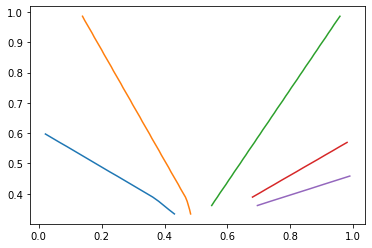

In [9]:
for data in datas:
    data[:, 0] = data[:, 0]/1280.0
    data[:, 1] = data[:, 1]/720.0
    
    print(data)
    
    plt.plot(data[:, 0], data[:, 1])

In [10]:
train_sizes = []
test_sizes = []

for data in datas:
    train_size = int(len(data)*0.90)
    test_size = len(data) - train_size
    
    train_sizes.append(train_size)
    test_sizes.append(test_size)

train_sizes, test_sizes

([18, 43, 41, 12, 7], [2, 5, 5, 2, 1])

18
8
43
11
41
11
12
8
7
7


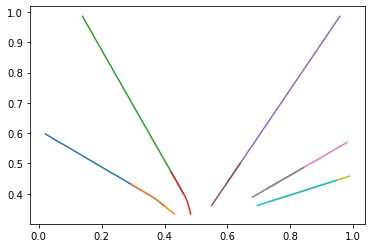

In [11]:
seq_len = 6

train_sets = []
test_sets = []

for idx, data in enumerate(datas):
    train_set = data[:train_sizes[idx]]
    print(len(train_set))
    test_set = data[train_sizes[idx]-seq_len:]
    print(len(test_set))
    
    train_sets.append(train_set)
    test_sets.append(test_set)
    
    plt.plot(train_set[:,0], train_set[:,1])
    plt.plot(test_set[:,0], test_set[:,1])
    
plt.show()

In [12]:
def make_sequence(norm_data, seq_len):
    inout_seq = []
    L = len(norm_data)
    
    data_x = []
    data_y = []
    
    for i in range(L-seq_len):
        train_seq = norm_data[i:i+seq_len]
        test_label = norm_data[i+seq_len:i+seq_len+1]
        
        data_x.append(train_seq)
        data_y.append(test_label)
    
    return np.array(data_x), np.array(data_y)

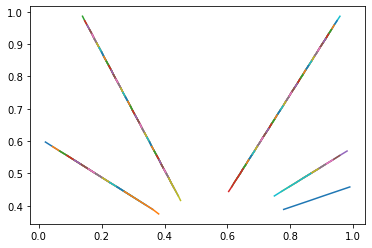

In [13]:
train_x_s = []
train_y_s = []

test_x_s = []
test_y_s = []

for train_set in train_sets:
    train_x, train_y = make_sequence(train_set, seq_len)
    train_x_s.append(train_x)
    train_y_s.append(train_y)

for test_set in test_sets:
    test_x, test_y = make_sequence(test_set, seq_len)
    test_x_s.append(test_x)
    test_y_s.append(test_y)
    
for train_x in train_x_s:
    for tr_x in train_x:
        plt.plot(tr_x[:,0], tr_x[:, 1])
    

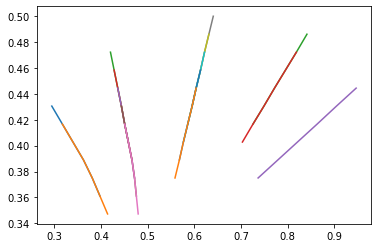

In [14]:

        
for test_x in test_x_s:
    for ts_x in test_x:
        plt.plot(ts_x[:,0], ts_x[:, 1])

In [15]:
import torch
import torch.nn as nn
from torch.autograd import Variable

train_x_tensors = []
train_y_tensors = []

test_x_tensors = []
test_y_tensors = []

for train_x in train_x_s:
    train_x_tensors.append(Variable(torch.Tensor(train_x)))

for train_y in train_y_s:
    train_y_tensors.append(Variable(torch.Tensor(train_y)))

for test_x in test_x_s:
    test_x_tensors.append(Variable(torch.Tensor(test_x)))
#     print(torch.Tensor(test_x).shape)
    
for test_y in test_y_s:
    test_y_tensors.append(Variable(torch.Tensor(test_y)))

In [16]:
class LSTM(nn.Module):
    def __init__(self, num_classes=2, input_size=2, hidden_size=50, num_layers =2 ,output_size = 2 ):
        super(LSTM,self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.lstm = nn.LSTM(input_size = input_size, hidden_size=hidden_size,num_layers = num_layers, batch_first = True)
        self.layers = nn.Sequential(
            nn.Linear(hidden_size, 60),
            nn.Linear(60,30),
            nn.Linear(30, output_size)
        )
        self.relu = nn.ReLU()
        
    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        
        x, (hidden, cell) = self.lstm(x, (h_0, c_0))
        x = self.relu(x)
        x = self.layers(x[:,-1,])
        return x

In [17]:
model = LSTM()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [18]:
print(model)

LSTM(
  (lstm): LSTM(2, 50, num_layers=2, batch_first=True)
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=60, bias=True)
    (1): Linear(in_features=60, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=2, bias=True)
  )
  (relu): ReLU()
)


In [19]:
epochs = 150

for epoch in range(epochs):
    model.train()
    
    avg_loss = 0
    
    for idx, (train_x_tensor, train_y_tensor) in enumerate(zip(train_x_tensors, train_y_tensors)):
        optimizer.zero_grad()
        
        predict = model.forward(train_x_tensor)
        
        loss = criterion(predict, train_y_tensor.view([-1,2]))
        loss.backward()
        
#         if epoch%25:
#             print('Epoch {}, Loss {:.5f}'.format(epoch, loss.item()))
        
        
        avg_loss = (avg_loss * idx + loss.item()) / (idx + 1)
        
        optimizer.step()
    
    if epoch%25 == 0:
        print('Epoch {}, Loss {:.5f}'.format(epoch, avg_loss))
        
    

Epoch 0, Loss 0.29536
Epoch 25, Loss 0.01184
Epoch 50, Loss 0.00406
Epoch 75, Loss 0.00013
Epoch 100, Loss 0.00042
Epoch 125, Loss 0.00021


(2, 2)
(5, 2)
(5, 2)
(2, 2)
(1, 2)


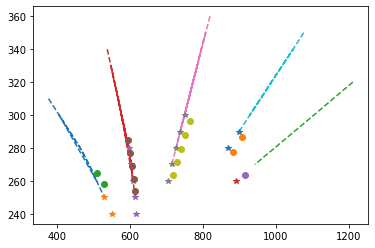

In [20]:
model.eval()

with torch.no_grad():
    for idx, (test_x_tensor, test_y_tensor) in enumerate(zip(test_x_tensors, test_y_tensors)):
        predict = model.forward(test_x_tensor).data.numpy()
        print(predict.shape)
        
        test_x_tensor = test_x_tensor.view(-1,2).data.numpy()
        test_y_tensor = test_y_tensor.view(-1,2).data.numpy()
        
        # test x plot
        plt.plot(test_x_tensor[:, 0]*1280,test_x_tensor[:, 1]*720, '--', label='lane' + str(idx))
#         print(test_x_tensor[:, 0]*1280,test_x_tensor[:, 1]*720)
        # test y plot
        plt.plot(test_y_tensor[:, 0]*1280,test_y_tensor[:, 1]*720, '*', label = 'gt point' + str(idx))
        # prediction plot
        plt.plot(predict[:,0]*1280 , predict[:, 1]*720, 'o', label = 'prediction_point'+ str(idx))
#         plt.legend()